# Final Project - K-Means Algorithm
## CSPB 2820 -  Linear Algebra with Computer Science Applications
*Name*: Sergio  Rojas-Aguilar

Submit only this Jupyter notebook with the name format `Final_Project_<yourname>.ipynb`. Do not compress it using tar, rar, zip, etc. You must test this notebook in Jupyter Lab.
Your solutions to analysis questions should be written directly below the associated question. You can add a write-up markdown cell or an extra Python cell if it wasn't provided.

All the written code must be commented as shown in this link https://realpython.com/python-comments-guide/ 

Remember that you are encouraged to discuss the problems with your classmates and instructors, 
but *you must write all code and solutions on your own*, and list any people or sources consulted.

The goal of K-means is to partition the data into $k$ clusters such that the sum of intra-cluster variances is minimal.

In this problem, we'll be implementing K-means and evaluate it on the multi_blobs data shown below.

### Question 1 : What is the significance of K in K-Means algorithm ? [2 point]

### Answer : 

The K in 'K means' is the number of clusters made of centroids that is chosen to fit a data set. Choosing the right number of clusters is important because it effects the quality of the results for each data set

In [2]:
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

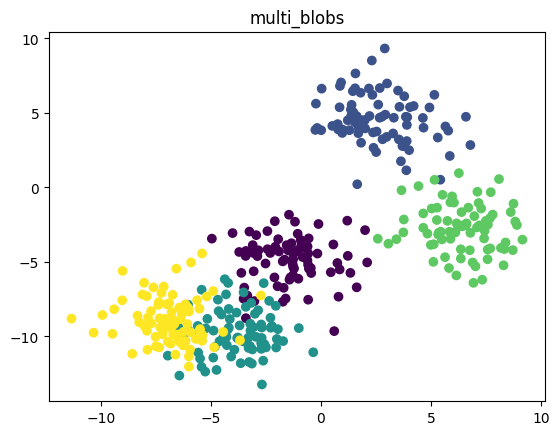

In [244]:
# Do not modify this cell
class DataBlobs:
    def __init__(self, centers, std=1.75):
        self.X, self.labels = make_blobs(n_samples=400, n_features=2, cluster_std=std, centers=centers,
                                         shuffle=False, random_state=5622)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.labels,
                                                                                test_size=0.3, random_state=5622)
multi_blobs = DataBlobs(centers=5, std=1.5)

plt.title("multi_blobs")
plt.scatter(multi_blobs.X[:, 0], multi_blobs.X[:, 1], c=multi_blobs.labels)
plt.show()


We will be using Euclidean distance as our variance measure, so for cluster $C_i = \{x_1,x_2,... x_{m_i}\}$, its intra-cluster variance $V(C_i)$ is defined as:

$$
V(C_i) = \sum_{j=1}^{m_i} ||x_j - \mu_i||^2
$$

where $\mu_i = \frac{1}{m} \sum_{i=1}^{m_i} x_i$. $\mu_i$ is called the centroid of cluster $C_i$.

So for $k$ clusters, K-means objective is:
$$
\min_{C_1,C_2\ldots C_k}\sum_{i=1}^{k}V(C_i) = \min_{C_1,C_2\ldots C_k} \sum_{i=1}^{k} \sum_{j=1}^{m_i} ||x_j - \mu_i||^2
$$

Each sample $x_i$ is assigned to the cluster of the closest centroid. Hence, finding the optimal partition $\{C_1,C_2...C_k\}$ that minimizes the objective is equivalent to finding the optimal centroids.

Unfortunately, there is no algorithm that reaches the global optima for K-means, but we'll be implementing the most famous heuristic for the problem: Llyod algorithm. It works as follows:

- Initialize the centroids with **unique** random samples (`initialize_centroids`), initial objective = $+\infty$
- Repeat until convergence:
    - Compute the distances matrix $D$ between samples and centroids (`compute_distances`)
    - Use $D$ to assign each sample to the cluster with the closest centroid (`computes_assignments`)
    - Update the centroids as centers of the new cluster assignments (`compute_centroids`)
    - Compute the new objective (`compute_objective`)
    - Stop if the improvement ratio of the objective is less than $\epsilon$

The improvement ratio equal to `|new_objective - previous_objective|/|previous_objective|`.


- **Implementation.1 (I.1) [8 points]** `initialize_centroids` : select K **distinct** samples from the matrix data `X` and use them as the initial centroids. Store these centroids in the class attribute `self.centroids` as an `np.array` of shape $k \times d$.
- **I.2 [8 points]** `compute_distances` : compute the distance of each sample $x_i$ to every centroid $c_j$ and return the result as a matrix `distances_matrix` of size $N \times k$ where `N` is the number of samples and `k` is the chosen number of clusters to be found. The cell `(i,k)` shall contain the euclidean distance between sample $x_i$ and centroid $m_k$.
- **I.3 [8 points]** `compute_assignments` : given the distances matrix of size $N \times k$ return an array of labels in which each element is an integer in the range $[0, k-1]$ and it represents which centroid it's closest to.
- **I.4 [10 points]** `compute_centroids` : Compute the new centroids depending on the new set of samples that has been alloted to each cluster.
- **I.5 [12 points]** `fit` : This shall contain your main loop which implements the algorithm described above. You'll sequentially call the methods above to find the $k$ centroids. Break the loop when the improvement ratio of the objective is within `rtol`. At the end (or start, depending on how you code it) of each iteration, call the method `save_plot` to save the current clustering status and save the current objective value in the `history` list.
- **I.6 [8 points]** `predict` : Given new samples, return their assigned clusters that were learned in the `fit` step.

While we're working on 2-d data (d=2) for visualization purposes, your implementation should handle any number of features.

In [245]:
class KMeans:
    def __init__(self, k, rtol=1e-3):
        """
        :param k: Number of centroids
        :param rtol: Epsilon
        """
        self.k = k #!Set the k to the class LMeans
        self.centroids = None #!intialize the centroids to None
        self.snapshots = []  #! buffer for progress plots Where do we use this? history?
        self.rtol = rtol #! the imporvement ratio we seek to hit before ending the algorithm
        self.save_plot = None

    def initialize_centroids(self, X):
        """
        Randomly select k **distinct** samples from the dataset in X as centroids
        @param X: np.ndarray of dimension (num_samples, num_features)
        @return: centroids array of shape (k, num_features)
        """
        # Workspace I.1
        #BEGIN 
        # code here
        
        # DataBlobsSampleSize = 400  #Test since the sample data was a 400, 2 matrix
        
        # Matrix.shape will give the shape of the matrix [0] will give the number of rows
        # X is the passed down Matrix
        sample_size = X.shape[0] #shoud be 400 for now
        number_of_choices = self.k # KMeans class hold value of the about of cluster we look to find
        
        
        indices = np.random.choice(sample_size, number_of_choices, replace=False) #False was added to prevent choosing the same index
        
        centroids = np.zeros((self.k, X.shape[1]))
        # centroids = X[indices] # intitialize array for centrios # test shows botton would also work and are equal to each other this seemed better after a code review and check online 
        for i in range(len(indices)):
            centroids[i]= X[indices[i]]
        
        #END
        return centroids

    def compute_distances(self, X):
        """
        Compute a distance matrix of size (num_samples, k) where each cell (i, j) represents the distance between
        i-th sample and j-th centroid. We shall use Euclidean distance here.
        :param X: np.ndarray of shape (num_samples, num_features)
        :return: distances_matrix : (np.ndarray) of the dimension (num_samples, k)
        """
        distances_matrix = np.zeros((X.shape[0], self.k))
        # Workspace I.2
        #BEGIN 
        # code here
        
        for j in range(distances_matrix.shape[1]):  # for loop for matrix j = k
            for i in range(X.shape[0]): # for loop matrix i = row height of X
                dist = np.linalg.norm(self.centroids[j]-X[i]) # euclidean norm of two points 
                distances_matrix[i][j] = dist #update matrix for each target point to centroid
                

                
        #END
        return distances_matrix

    @staticmethod
    def compute_assignments(distances_to_centroids):
        """
        Compute the assignment array of shape (num_samples,) where assignment[i] = j if and only if
        sample i belongs to the cluster of centroid j
        :param distances_to_centroids: The computed pairwise distances matrix of shape (num_samples, k)
        :return: assignments array of shape (num_samples,)
        """

        assignments = np.zeros((distances_to_centroids.shape[0],))

       # Workspace I.3
        #BEGIN 
        # code here   
        
        for i in range(distances_to_centroids.shape[0]): #recurrsive 
            assignments[i] = np.argmin(distances_to_centroids[i]) # better using numpy
            # testArray = Dm[i]     # set to nparray
            # lowest_Value = min(testArray)  # find the lowert value
            # assignments[i] = np.where(testArray == lowest_Value)[0][0]  # finding the index of lowest value and returning the first index
            
        
        
        #END
        return assignments.astype(int) #!!! cause errors assignments to return as int value only

    def compute_centroids(self, X, assignments):
        """
        Given the assignments array for the samples, compute the new centroids
        :param X: data matrix of shape (num_samples, num_features)
        :param assignments: array of shape (num_samples,) where assignment[i] is the current cluster of sample i
        :return: The new centroids array of shape (k, num_features)
        """
        # Workspace I.4
        centroids = np.zeros((self.k, X.shape[1]))
        #BEGIN 

        #Reviewed from other code after not being about to add mean to on array learned about X[assign == i] as a booleen operation
        for i in range(self.k):
            cluster_p = X[assignments == i] #create np arrat from Matrix X iteratring when vector assignments is true
            # print(cluster_p)
            centroids[i] = np.mean(cluster_p, axis= 0) #find the mean of row (axis = 0)
       
        #END
        return centroids

    def compute_objective(self, X, assignments):
        return np.sum(np.linalg.norm(X - self.centroids[assignments], axis=1) ** 2)

    def fit(self, X):
        """
        Implement the K-means algorithm here as described above. Loop until the improvement ratio of the objective
        is lower than rtol. At the end of each iteration, save the k-means objective and return the objective values
        at the end

        @param X:
        @return:
        """
        self.centroids = self.initialize_centroids(X)
        objective = 1e10 #!! changed because was getting runtime error
        # assignments = np.zeros((X.shape[0],)) #!removed
        history =[] #! Added History list outside of while loop
        # Workspace I.5

        while True:
            #BEGIN 
            # code here
            distance_matrix = self.compute_distances(X)             # Create distance matrix from every point to the k centroids
            assignments = self.compute_assignments(distance_matrix) # assign each point to the closest centroids 
            new_centroids = self.compute_centroids(X, assignments)  #Create the new centroid based on the mean value each cluster
            new_objective = self.compute_objective(X, assignments)  #error tolerance 
            
            
            
            history.append(new_objective) #add objective number to history array
            
            if abs(objective - new_objective) / abs(objective) < self.rtol: # do a check to stop loop once we hit a smaller rtol
                break
            
            objective = new_objective
            self.centroids = new_centroids
            self.save_plot = assignments
            
            #END
        return history

    def predict(self, X):
        # Workspace I.6
        # assignments = np.zeros((X.shape[0],))
        #BEGIN 
        # code here
        self.fit(X)
        assignments = self.save_plot
        #END
        return assignments


### Question 2 : Explain how will the intial centroids affect the working of the K-Means algorithm. [2 point]

### Answer : 
Choosing a initial centroid is important because it effects the start of the algorithm and can change the way the data is represented after finalization. Like if the centriods were chosen to close together it would cause the data cluster to be misrepresnted. 
Some time it could create an inbalance in the clusters due to centroid placement. Or if the intial centroid is an outlier point it could be that the group cluster only has the one point in its group.

In [246]:
k_means = KMeans(5)
objective_history = k_means.fit(multi_blobs.X)

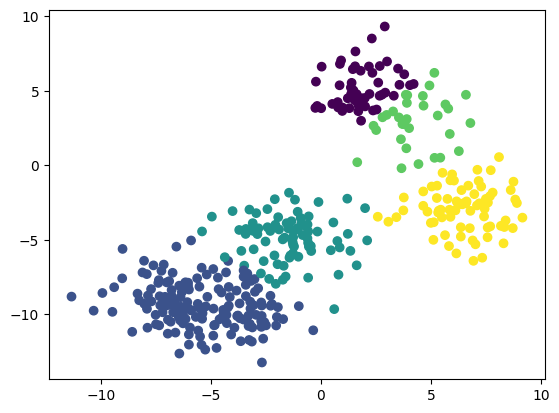

In [247]:
plt.scatter(multi_blobs.X[:,0],multi_blobs.X[:,1],c=k_means.save_plot)

## Evaluating K-means
The easiest way to evaluate the clustering quality is to use the true labels. The natural question here is: which cluster corresponds to which label?

Let's first formulate the question using `multi_blobs` dataset. We have 5 clusters and 5 classes in our data. Let's create a _confusion matrix_ $C$ between the clusters and the labels so that $ C_{i,j} = \text{size}(\text{cluster}_i \cap \text{class}_j)$.

We model the unknown mapping using the $5\times 5$ boolean matrix $X$ such that $X_{i,j}=1$ if and only if $\text{cluster}_i$ is mapped to $\text{class}_j$.

To avoid having a cluster assigned to multiple classes, each row of $X$ is constrained to have only one non-zero entry.

Now, given a mapping $X$ and confusion matrix $C$, the number of correctly "classified" samples (not really classification, more of clustering here) is:

\begin{align}
\#\text{correct} = \sum_i \sum_j C_{i,j} X_{i,j}
\end{align}
The goal is to find $\hat{X}$ that maximizes $\#\text{correct}$. To solve for $X$ we're going to use `scipy`'s `linear_sum_assignment`
([documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html)).

**I.7 [10 points]** Complete `evaluate_clustering` to return the accuracy of K-means using the optimal mapping $\hat{X}$ defined above.

In [248]:
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix

In [249]:
def evaluate_clustering(trained_model, X, labels):
    """
    Compute the ratio of correct matches between clusters from the trained model and the true labels
    :param trained_model: Unsupervised learning model that predicts clusters
    :param X: samples array, shape (num_samples, num_features)
    :param labels: true labels array, shape (num_samples,
    :return:
    """
    # We can assume that the number of clusters and the number of class labels are the same
    confusion_matrix = np.zeros((5,5), dtype=int)
    boolean_matrix_X = np.zeros((5,5), dtype=int)
    clusters = trained_model.predict(X) 
    # Workspace I.7
    #BEGIN 
    # code here
    
    for i in range(confusion_matrix.shape[1]):
        for j in range(confusion_matrix.shape[1]):
            confusion_matrix[i, j] = np.sum((labels == i) & (clusters == j)) # sum if the labels and cluster are the same
            
    row_ind, col_ind = linear_sum_assignment(-confusion_matrix) # linearsum of neg confusion matrix
            
    num_correct = confusion_matrix[row_ind, col_ind].sum() # sum the row and column
        
    accuracy = num_correct /len(labels) # number correct over the total number of samples of lenght of labels
    #END
    return accuracy

### Question 3 : What other performance metrics can be used to evaluate K-Means performance ? [2 point]

### Answer :

Within-cluster sum of squares:

The sum of of the euclidean distance of all square in a cluster to it corrisponding centroid.
Measuer how close the point are to the given centroids

Between cluster sum of squares

Measure the centroid from the mid point in the data set.
Found by geting the distance of each end centroid to the mid point of the data set and multipling for each data point in that cluster



**I.8 [16 points]** Run K-means on the full `multi_blobs` for 20 times. Plot the histogram (`plt.hist`) of the clustering evaluation from `evaluate_clustering`. Also report the mean clustering performance

(array([ 3.,  0.,  3.,  1.,  0.,  0.,  0.,  0.,  0., 13.]),
 array([0.615  , 0.64625, 0.6775 , 0.70875, 0.74   , 0.77125, 0.8025 ,
        0.83375, 0.865  , 0.89625, 0.9275 ]),
 <BarContainer object of 10 artists>)

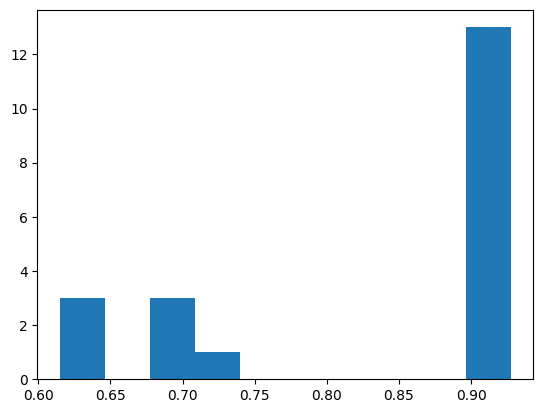

In [250]:
%matplotlib inline
accuracies = []
# Workspace I.8
#BEGIN 
# code here
testcase2 = KMeans(5)
for i in range(20):
    accuracies.append(evaluate_clustering(testcase2,multi_blobs.X,multi_blobs.labels))

plt.hist(accuracies)
#END

### Question 4 : Is there any modification you can do to the K-Means to improve the performance ? If so explain. [4 point]

### Answer :

One way to achieve better results could be to create a method for selecting centroids to produce more balanced clusters.

Another approach could involve running the program automatically 20 times and selecting the model with the highest accuracy.

Also, denoising the data by removing outliers before running the algorithm could performance. Similar to converting a photo to a black-and-white image to reduce noise from areas with few pixels. Setting a noise reduction precentage and converting the data back to points. Then running K-Means once again. Although maybe this method may be more effective for 2D and 3D data.